In [2]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict, LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
import matplotlib.pyplot as plt

import random
from datetime import datetime

import arff

In [3]:
solvent_data = pd.read_excel('/Users/jlisd/Downloads/AI Chem/AI Chem/Holistic prediction of enantioselectivity in asymmetric catalysis.Supplementary Data.xlsx', sheet_name = 'solvent')
solvent_data.set_index('solvent_name', inplace = True)
solvent_columns = list(solvent_data.columns)

In [4]:
nucleophile_data = pd.read_excel('/Users/jlisd/Downloads/AI Chem/AI Chem/Holistic prediction of enantioselectivity in asymmetric catalysis.Supplementary Data.xlsx', sheet_name = 'nucleophiles')
nucleophile_data.set_index('nucleophile_name', inplace = True)
nucleophile_columns = list(nucleophile_data.columns)

In [5]:
raw_catalyst_data = pd.read_excel('/Users/jlisd/Downloads/AI Chem/AI Chem/Holistic prediction of enantioselectivity in asymmetric catalysis.Supplementary Data.xlsx', sheet_name = 'full_catalyst')
raw_catalyst_data.rename(columns = {'last catalyst only S used': 'catalyst_name'}, inplace = True)

r_catalyst_data = raw_catalyst_data.copy()
for i in range(17):
    r_catalyst_data.iloc[i, 1] = r_catalyst_data.iloc[i, 1].replace('R/S', 'R')

s_catalyst_data = raw_catalyst_data.copy()
for i in range(17):
    s_catalyst_data.iloc[i, 1] = s_catalyst_data.iloc[i, 1].replace('R/S', 'S')

catalyst_data = pd.concat([r_catalyst_data, s_catalyst_data])
catalyst_data.set_index('catalyst_name', inplace = True)
catalyst_columns = list(catalyst_data.columns)

In [6]:
raw_catalyst_data = pd.read_excel('/Users/jlisd/Downloads/AI Chem/AI Chem/Holistic prediction of enantioselectivity in asymmetric catalysis.Supplementary Data.xlsx', sheet_name = 'full_catalyst')
raw_catalyst_data.rename(columns = {'last catalyst only S used': 'catalyst_name'}, inplace = True)

#Taking care of catalyst R/S
r_catalyst_data = raw_catalyst_data.copy()
for i in range(17):
    r_catalyst_data.iloc[i, 1] = r_catalyst_data.iloc[i, 1].replace('R/S', 'R')
    #print(r_catalyst_data.iloc[i, 1])
#r_catalyst_data.drop(17, inplace = True)    

s_catalyst_data = raw_catalyst_data.copy()
for i in range(17):
    s_catalyst_data.iloc[i, 1] = s_catalyst_data.iloc[i, 1].replace('R/S', 'S')
    #print(s_catalyst_data.iloc[i, 1])
    
catalyst_data = pd.concat([r_catalyst_data, s_catalyst_data])
catalyst_data.rename(columns = {'Unnamed: 1': 'catalyst_name'}, inplace = True)
catalyst_data.set_index('catalyst_name', inplace = True)

catalyst_columns = list(catalyst_data.columns)

catalyst_data

,Ar group,arhs,alhs,aavg,b,AREA(q),sin(AREA),Lwhole R,B1whole R,B5whole R,...,C3 A,C4 A,C5 A,C6 A,nPOsy,iPOsy,nPOas,iPOas,P,PNMR
catalyst_name,,,,,,,,,,,,,,,,,,,,,
"(R)-2,2'-Dihydroxy-3,3'-diphenyl-1,1'-binaphthalene cyclic phosphate",Ph,54.388,54.395,54.3915,56.388,70,0.773891,6.89,1.70,3.33,...,-0.23000,-0.22400,-0.21100,-0.186000,1085.06,364.3460,1306.55,271.6062,2.54600,266.5125
"(R)-3,3′-Bis(4-nitrophenyl)-1,1′-binaphthyl-2,2′-diyl hydrogenphosphate",4-NO2C6H4,52.789,52.801,52.7950,56.202,64,0.920026,8.28,1.70,3.34,...,-0.17700,0.01000,-0.19500,-0.207000,1086.44,320.2800,1310.44,295.3595,2.54500,266.1502
"(R)-3,3'-Bis[4-(2,4,6-trimethylphenyl)phenyl]-1,1'-binaphthyl-2,2'-diyl Hydrogen Phosphate","4-(2,4,6-MeC6H2)C6H4",53.962,53.963,53.9625,56.355,38,0.296369,12.27,2.97,4.61,...,-0.20700,-0.05300,-0.22300,-0.199000,1085.55,356.6200,1306.58,242.2277,2.54600,266.3224
"(R)-3,3′-Bis(4-chlorophenyl)-1,1′-binaphthyl-2,2′-diyl hydrogenphosphate",4-ClC6H4,53.704,53.718,53.7110,56.219,67,-0.855520,8.21,1.70,3.33,...,-0.23200,-0.03000,-0.25000,-0.190000,1085.19,338.5586,1306.11,286.4410,2.54600,266.1394
"(R)-3,3'-Bis(4-diphenyl)-1,1'-binaphthyl 2,2'-diyl hydrogenphosphate",4-PhC6H4,42.215,52.094,47.1545,55.769,50,-0.262375,11.22,2.01,3.50,...,-0.19550,-0.06650,-0.20200,-0.183500,1087.44,332.8368,1317.37,222.6765,2.53900,268.1404
"(R)-3,3′-Bis(4-trifluoromethylphenyl)-1,1′-binaphthyl-2,2′-diyl hydrogenphosphate",4-CF3C6H4,53.619,53.627,53.6230,56.229,56,-0.521551,8.28,1.83,3.34,...,-0.19300,-0.17200,-0.17700,-0.184000,1086.23,355.7629,1307.21,397.3333,2.54500,266.1523
"(R)-3,3′-Bis(3,5-dinitrolphenyl)-1,1′-binaphthyl-2,2′-diyl hydrogenphosphate","3,5-NO2C6H3",59.563,59.562,59.5625,55.628,66,-0.026551,7.58,1.70,5.12,...,0.02900,-0.17300,0.01300,-0.154000,1087.41,296.0611,1317.62,300.6142,2.54300,266.2896
"(R)-3,3'-Bis(3,5-diphenyl)phenyl-1,1'-binaphthyl-2,2'-diyl Hydrogen Phosphate","3,5-PhC6H3",42.585,60.259,51.4220,54.746,36,-0.991779,8.59,2.59,7.06,...,-0.04700,-0.18750,-0.05650,-0.171500,1085.98,366.5389,1310.24,248.6693,2.54800,269.8459
"(R)-3,3′-Bis[3,5-bis(trifluoromethyl)phenyl]-1,1′-binaphthyl-2,2′-diyl hydrogenphosphate","3,5-(CF3)2-C6H3",55.665,55.883,55.7740,56.229,62,-0.739181,7.44,2.39,5.06,...,-0.14850,-0.16150,-0.16650,-0.157000,1086.10,320.0554,1312.33,202.3039,2.54400,266.3457


In [7]:
iminium_data = pd.read_excel('/Users/jlisd/Downloads/AI Chem/AI Chem/Holistic prediction of enantioselectivity in asymmetric catalysis.Supplementary Data.xlsx', sheet_name = 'iminiums')
iminium_data.rename(columns = {'imine': 'iminium_name', 'electronic energy difference (kcal/mol) ': 'electronic energy difference (kcal/mol)'}, inplace = True)
#removed space at the end of electronic energy
iminium_data.set_index('iminium_name', inplace = True)
iminium_data.drop(labels = ['Unnamed: 1'], axis = 1, inplace = True)
for i in range(1, 181):
    z_iminium_name = '(Z)-Iminium ' + str(i)
    e_iminium_name = '(E)-Iminium ' + str(i)
    iminium_data.loc[z_iminium_name, 'electronic energy difference (kcal/mol)'] = iminium_data.loc[e_iminium_name, 'electronic energy difference (kcal/mol)']
iminium_columns = list(iminium_data.columns)

In [8]:
iminium_data.head()

,nNH,i NH,N,H (iminium),C,SubL,SubS,PG,PGL,PGB1,...,SL,SB1,SB5,LL,LB1,LB5,HOMO (iminium),LUMO (iminium),Polarizability (iminium),electronic energy difference (kcal/mol)
iminium_name,,,,,,,,,,,,,,,,,,,,,
(E)-Iminium 1,3474.83,97.5295,-0.426,0.442,0.487,-0.464,-0.697,0.030,8.85,1.76,...,3.59,1.7,2.12,4.61,1.7,7.04,-0.40205,-0.17518,201.89,1.62
(Z)-Iminium 1,3491.05,82.0336,-0.430,0.424,0.526,-0.488,-0.687,0.017,8.84,1.77,...,3.59,1.7,2.13,4.77,1.7,7.17,-0.40330,-0.17332,193.50,1.62
(E)-Iminium 2,3400.90,359.5285,-0.447,0.457,0.477,-0.466,-0.690,0.031,8.81,1.75,...,3.59,1.7,2.12,4.76,1.7,5.63,-0.40541,-0.17578,164.07,1.86
(Z)-Iminium 2,3494.88,82.0612,-0.438,0.425,0.523,-0.503,-0.689,0.022,8.85,1.76,...,3.59,1.7,2.13,4.66,1.7,5.07,-0.40963,-0.17836,160.51,1.86
(E)-Iminium 3,3196.55,910.2524,-0.419,0.469,0.420,-0.140,-0.690,0.032,8.79,1.74,...,3.59,1.7,2.12,7.09,1.7,7.45,-0.40169,-0.18157,220.26,0.69


In [9]:
class Reaction():
    
    def __init__(self, name, entry, catalyst, nucleophile, substrate, solvent, iminium_type, iminium, majorenantiomer, minorenantiomer, ee, G):
        self.name = name
        self.entry = entry
        self.catalyst = catalyst
        self.nucleophile = nucleophile
        self.substrate = substrate
        self.solvent = solvent
        self.iminium_type = iminium_type
        self.iminium = iminium
        self.majorenantiomer = majorenantiomer
        self.minorenantiomer = minorenantiomer
        self.ee = ee
        self.G = G
            
        self.solvent_properties = dict()
        for column in solvent_columns:
            self.solvent_properties[column] = solvent_data.loc[solvent, column]
            
        self.catalyst_properties = dict()
        for column in catalyst_columns:
            self.catalyst_properties[column] = catalyst_data.loc[catalyst, column]
            
        self.nucleophile_properties = dict()
        for column in nucleophile_columns:
            self.nucleophile_properties[column] = nucleophile_data.loc[nucleophile, column]
        
        self.e_iminium = '(E)-' + str(iminium)
        self.z_iminium = '(Z)-' + str(iminium)
        
        self.e_iminium_properties = dict()
        self.z_iminium_properties = dict()
        for column in iminium_columns:
            self.e_iminium_properties[column] = iminium_data.loc[self.e_iminium, column]
            self.z_iminium_properties[column] = iminium_data.loc[self.z_iminium, column]
            
        
            
    def __repr__(self):
        return "Reaction - {}".format(self.name)
        #iminium stuff

In [10]:
reactions = dict()

def process_data(reaction_number, reaction, iminium_type, sheetname = None):
    reaction_file = '/Users/jlisd/Downloads/AI Chem/AI Chem/reaction info 5-23/' + str(reaction_number) + ' ' + reaction + '.xlsx'
    if sheetname == None:
        data = pd.read_excel(reaction_file)
    else:
        data = pd.read_excel(reaction_file, sheet_name = sheetname)
        
    data.set_index('entry', inplace = True)
    
    entries = len(data)
    for entry in range(1, entries + 1):
        if sheetname == None:
            reaction_name = reaction + ' ' + str(entry)
        else:
            reaction_name = reaction + ' ' + sheetname + ' ' + str(entry)
        
        
        reactions[reaction_name] = Reaction(reaction_name, 
                                            entry,
                                            data.loc[entry, 'Catalyst'],
                                            data.loc[entry, 'Nucleophile'],
                                            data.loc[entry, 'Substrate'],
                                            data.loc[entry, 'Solvent'],
                                            iminium_type,
                                            data.loc[entry, 'Iminium'],
                                            data.loc[entry, 'Major Enantiomer'],
                                            data.loc[entry, 'Minor Enantiomer'],
                                            data.loc[entry, 'ee'],
                                            data.loc[entry, 'ΔΔG‡'])
        


In [11]:
#process_data(1, 'Addition of Alcohols', 'E', 'Scope')
process_data(2, 'Addition of thiols', 'E', 'Catalyst & solvent screening da')
#process_data(2, 'Addition of thiols', 'E', 'Effect of catalyst loading')
#process_data(2, 'Addition of thiols', 'E', 'Imine scope')
#process_data(2, 'Addition of thiols', 'E', 'Thiol scope')
#process_data(3, 'Hydrophosphonylation of imines', 'E', 'Catalyst screening data')
#process_data(3, 'Hydrophosphonylation of imines', 'E', 'Scope')
process_data(4, 'Addition of diazomethylphosphonates', 'E', "Optimization of catalyst and re")
#process_data(4, 'Addition of diazomethylphosphonates', 'E', "Imine scope")
process_data(5, 'Addition of diazoacetamides', 'E', 'Catalyst screening data')
#process_data(5, 'Addition of diazoacetamides', 'E', 'Solvent screening data')
#process_data(5, 'Addition of diazoacetamides', 'E', 'Substrate(s) scope')
process_data(6, 'Strecker Reaction (with aldimines)', 'E', 'Catalyst screening data')
#process_data(6, 'Strecker Reaction (with aldimines)', 'E', 'Solvent screening data')
#process_data(6, 'Strecker Reaction (with aldimines)', 'E', 'Imine scope')
process_data(7, 'Peroxidation of imines', 'E', 'Catalyst screening data')
#process_data(7, 'Peroxidation of imines', 'E', 'Solvent screening data')
#process_data(7, 'Peroxidation of imines', 'E', 'Substrate(s) scope')
process_data(8, 'Transfer Hydrogenation of b,g-Alkynyl a-Imino Esters', 'E', 'Catalyst screening and reaction')
#process_data(8, 'Transfer Hydrogenation of b,g-Alkynyl a-Imino Esters', 'E', 'Scope')
#process_data(9, 'Transfer Hydrogenation of Enamides', 'E', 'Scope')
process_data(10, 'Transfer Hydrogenation of N-aryl imines (List)', 'Z', 'Catalyst screening data')
#process_data(10, 'Transfer Hydrogenation of N-aryl imines (List)', 'Z', 'Imine scope')
process_data(11, 'Transfer Hydrogenation of N-aryl imines (Rueping)', 'Z', 'Catalyst screening data')
#process_data(11, 'Transfer Hydrogenation of N-aryl imines (Rueping)', 'Z', 'Solvent screening data')
#process_data(11, 'Transfer Hydrogenation of N-aryl imines (Rueping)', 'Z', 'Imine scope')
process_data(12, 'Reductive amination of N-aryl imines (Macmillan)', 'Z', 'Reaction optimization')
#process_data(13, 'Transfer Hydrogenation of trifluoromethyl ketimines', 'Z', 'Benzothiazoline screening data')
#process_data(13, 'Transfer Hydrogenation of trifluoromethyl ketimines', 'Z', 'Imine scope')
process_data(14, 'Transfer Hydrogenation of N-aryl imines by benzothiazoline', 'Z', 'Catalyst screening data')
#process_data(14, 'Transfer Hydrogenation of N-aryl imines by benzothiazoline', 'Z', 'Benzothiazoline screening data')
#process_data(14, 'Transfer Hydrogenation of N-aryl imines by benzothiazoline', 'Z', 'Imine scope')
process_data(15, 'Reductive amination of aliphatic ketones by benzothiazoline', 'Z', 'Catalyst screening data')
#process_data(15, 'Reductive amination of aliphatic ketones by benzothiazoline', 'Z', 'Imine scope')
#process_data(16, 'Transfer Hydrogenation of ethyl ketimines', 'Z', 'Benzothiazoline screening data')
#process_data(16, 'Transfer Hydrogenation of ethyl ketimines', 'Z', 'Scope 1 benzothiazoline')
#process_data(16, 'Transfer Hydrogenation of ethyl ketimines', 'Z', 'Scope 2 dihydropyridine')
process_data(17, 'Strecker Reaction (with ketimines)', 'Z', 'Catalyst screening data')
#process_data(17, 'Strecker Reaction (with ketimines)', 'Z', 'Solvent data')
#process_data(17, 'Strecker Reaction (with ketimines)', 'Z', 'Imine scope')
#process_data(18, 'Addition of enecarbamates to benzoyl imines')
#process_data(19, 'Hydrogenation of fluorinated alkynyl ketimines')
#process_data(20, 'Addition of thiols to imines (Denmark)')

In [12]:
print(len(reactions))

88


In [13]:
catalyst = pd.DataFrame(columns = ['Reaction'] + catalyst_columns)
catalyst.set_index('Reaction', inplace = True)

for reaction in reactions:
    for column in catalyst_columns:
        catalyst.loc[reaction, column] = reactions[reaction].catalyst_properties[column]
        
#first column is numerical

In [14]:
catalyst.head()

,Ar group,arhs,alhs,aavg,b,AREA(q),sin(AREA),Lwhole R,B1whole R,B5whole R,...,C3 A,C4 A,C5 A,C6 A,nPOsy,iPOsy,nPOas,iPOas,P,PNMR
Reaction,,,,,,,,,,,,,,,,,,,,,
Addition of thiols Catalyst & solvent screening da 1,9-Anthryl,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,...,-0.054,-0.162,-0.059,-0.049,1088.24,321.983,1324.49,223.989,2.539,268.953
Addition of thiols Catalyst & solvent screening da 2,"3,5-(CF3)2-C6H3",55.665,55.883,55.774,56.229,62,-0.739181,7.44,2.39,5.06,...,-0.1485,-0.1615,-0.1665,-0.157,1086.1,320.055,1312.33,202.304,2.544,266.346
Addition of thiols Catalyst & solvent screening da 3,"2,4,6-MeC6H2",76.489,76.487,76.488,54.871,61,-0.966118,7.94,1.83,4.48,...,-0.221,-0.021,-0.226,0.02,1087.4,216.511,1313.07,257.344,2.554,269.514
Addition of thiols Catalyst & solvent screening da 4,"2,4,6-iPrC6H2",73.713,72.861,73.287,54.231,51,0.670229,9.09,3.23,5.67,...,-0.2275,-0.00855,-0.2305,0.0345,1088.86,196.111,1316.13,257.1,2.562,270.465
Addition of thiols Catalyst & solvent screening da 5,"2,4,6-iPrC6H2",73.713,72.861,73.287,54.231,51,0.670229,9.09,3.23,5.67,...,-0.2275,-0.00855,-0.2305,0.0345,1088.86,196.111,1316.13,257.1,2.562,270.465


In [15]:
nucleophile = pd.DataFrame(columns = ['Reaction'] + nucleophile_columns)
nucleophile.set_index('Reaction', inplace = True)

for reaction in reactions:
    for column in nucleophile_columns:
        nucleophile.loc[reaction, column] = reactions[reaction].nucleophile_properties[column]
        
#first column is numerical

In [16]:
nucleophile.head()

,nucleophile,H (nucleophile),X,Nu,nXH,iXH,HOMO (nucleophile),LUMO (nucleophile),Polarizability (nucleophile),L,B1,B5,bond distance H-X,H-X-Nu,H-X-CNu
Reaction,,,,,,,,,,,,,,,
Addition of thiols Catalyst & solvent screening da 1,thiolphenol,0.123,0.048,0.048,2756.24,0.057,-0.27252,0.01469,84.69,5.56,1.8,6.66,1.34,180,180
Addition of thiols Catalyst & solvent screening da 2,thiolphenol,0.123,0.048,0.048,2756.24,0.057,-0.27252,0.01469,84.69,5.56,1.8,6.66,1.34,180,180
Addition of thiols Catalyst & solvent screening da 3,thiolphenol,0.123,0.048,0.048,2756.24,0.057,-0.27252,0.01469,84.69,5.56,1.8,6.66,1.34,180,180
Addition of thiols Catalyst & solvent screening da 4,thiolphenol,0.123,0.048,0.048,2756.24,0.057,-0.27252,0.01469,84.69,5.56,1.8,6.66,1.34,180,180
Addition of thiols Catalyst & solvent screening da 5,thiolphenol,0.123,0.048,0.048,2756.24,0.057,-0.27252,0.01469,84.69,5.56,1.8,6.66,1.34,180,180


In [17]:
solvent = pd.DataFrame(columns = ['Reaction'] + solvent_columns)
solvent.set_index('Reaction', inplace = True)

for reaction in reactions:
    for column in solvent_columns:
        solvent.loc[reaction, column] = reactions[reaction].solvent_properties[column]
        
#first column is numerical

In [18]:
solvent.head()

,solvent,First Zagreb,First Zagreb index by valence vertex degrees,Second Zagreb,Second Zagreb index by valence vertex degrees,Polarity,Narumi Simple Topological,Narumi Harmonic Topological,Narumi Geometric Topological,Total structure connectivity,...,CLOGP,MR,CMR,RMM,Density,no. of H bond donor,no. H bond acceptor,Polarizability (solvent),HOMO (solvent),LUMO (solvent)
Reaction,,,,,,,,,,,,,,,,,,,,,
Addition of thiols Catalyst & solvent screening da 1,ether,14,46,12,28,2,2.079,1.429,1.516,0.354,...,0.87,22.4,2.1857,74.12,0.7134,0,1,54.87,-0.32774,0.07131
Addition of thiols Catalyst & solvent screening da 2,ether,14,46,12,28,2,2.079,1.429,1.516,0.354,...,0.87,22.4,2.1857,74.12,0.7134,0,1,54.87,-0.32774,0.07131
Addition of thiols Catalyst & solvent screening da 3,ether,14,46,12,28,2,2.079,1.429,1.516,0.354,...,0.87,22.4,2.1857,74.12,0.7134,0,1,54.87,-0.32774,0.07131
Addition of thiols Catalyst & solvent screening da 4,ether,14,46,12,28,2,2.079,1.429,1.516,0.354,...,0.87,22.4,2.1857,74.12,0.7134,0,1,54.87,-0.32774,0.07131
Addition of thiols Catalyst & solvent screening da 5,tetrahydrofuran,20,52,20,36,0,3.466,2,2,0.177,...,0.526,20.12,2.0083,72.11,0.8892,0,1,48.47,-0.32835,0.06707


In [19]:
iminium = pd.DataFrame(columns = ['Reaction', "iminium_type"] + iminium_columns)
iminium.set_index('Reaction', inplace = True)

for reaction in reactions:
    if reactions[reaction].iminium_type == 'E':
        iminium.loc[reaction, "iminium_type"] = 'E'
        for column in iminium_columns:
            iminium.loc[reaction, column] = reactions[reaction].e_iminium_properties[column]
    elif reactions[reaction].iminium_type == 'Z':
        iminium.loc[reaction, "iminium_type"] = 'Z'
        for column in iminium_columns:
            iminium.loc[reaction, column] = reactions[reaction].z_iminium_properties[column]

            

In [20]:
iminium.head()

,iminium_type,nNH,i NH,N,H (iminium),C,SubL,SubS,PG,PGL,...,SL,SB1,SB5,LL,LB1,LB5,HOMO (iminium),LUMO (iminium),Polarizability (iminium),electronic energy difference (kcal/mol)
Reaction,,,,,,,,,,,,,,,,,,,,,
Addition of thiols Catalyst & solvent screening da 1,E,3569.31,83.7481,-0.533,0.427,0.306,-0.2,0.255,0.69,6.63,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of thiols Catalyst & solvent screening da 2,E,3569.31,83.7481,-0.533,0.427,0.306,-0.2,0.255,0.69,6.63,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of thiols Catalyst & solvent screening da 3,E,3569.31,83.7481,-0.533,0.427,0.306,-0.2,0.255,0.69,6.63,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of thiols Catalyst & solvent screening da 4,E,3569.31,83.7481,-0.533,0.427,0.306,-0.2,0.255,0.69,6.63,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of thiols Catalyst & solvent screening da 5,E,3569.31,83.7481,-0.533,0.427,0.306,-0.2,0.255,0.69,6.63,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67


In [21]:
ee = pd.DataFrame(columns = ['Reaction', 'ee'])
ee.set_index('Reaction', inplace = True)

for reaction in reactions:
    ee.loc[reaction, 'ee'] = reactions[reaction].ee

In [22]:
Y = pd.DataFrame(columns = ['Reaction', 'ΔΔG‡'])
Y.set_index('Reaction', inplace = True)

for reaction in reactions:
    Y.loc[reaction, 'ΔΔG‡'] = reactions[reaction].G
    

In [23]:
print(catalyst.shape, nucleophile.shape, solvent.shape, iminium.shape, ee.shape)

(88, 85) (88, 15) (88, 160) (88, 22) (88, 1)


In [24]:
X_iminium = pd.concat([catalyst.drop(['Ar group'], axis = 1), 
               nucleophile.drop(['nucleophile'], axis = 1), 
               solvent.drop(['solvent'], axis = 1), 
               iminium.drop(['iminium_type'], axis = 1)], axis = 1)
X_iminium.shape

(88, 278)

In [25]:
#no iminium features
X_no_iminium = pd.concat([catalyst.drop(['Ar group'], axis = 1), 
               nucleophile.drop(['nucleophile'], axis = 1), 
               solvent.drop(['solvent'], axis = 1)], axis = 1)
X_no_iminium.shape

(88, 257)

In [26]:
for reaction in reactions:
    if iminium.loc[reaction, 'iminium_type'] == 'Z':
        Y.loc[reaction, 'ΔΔG‡'] = Y.loc[reaction, 'ΔΔG‡'] * (-1)

In [36]:
X_oos = pd.read_excel('X_oos.xlsx', index = 'Reaction')
X_oos_iminium = pd.read_excel('X_oos_iminium.xlsx', index = Reaction)
Y_oos = pd.read_excel('Y_oos.xlsx', index = 'Reaction')

X_oos.set_index('Reaction', inplace = True)
X_oos_iminium.set_index('Reaction', inplace = True)
Y_oos.set_index('Reaction', inplace = True)

###############################################################################################################################

End of Data Processing

###############################################################################################################################

In [27]:
random_state = random.seed(datetime.now())
test_size = 0.5
X = X_iminium

In [32]:
forest = RandomForestRegressor(max_depth = 3)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

forest.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())
Y_pred = forest.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = forest.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']
train_results
print('Train r^2 score:' + str(r2_score(train_results['Actual'], train_results['Predicted'])))

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

MSE: 0.21324392265905437
r^2: 0.8636279977833266
Train r^2 score:0.9484738408541308
Total r^2 score: 0.9108334118542689


In [33]:
forest.feature_importances_
features = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(forest.feature_importances_)], axis = 1)
features.columns = ['Feature', 'Importance']
features.set_index('Feature', inplace = True)
features.sort_values(by = ['Importance'], ascending = False, inplace = True)

for feature in features.index:
    if feature in solvent_columns:
        features.loc[feature, 'type'] = 'solvent'
    elif feature in nucleophile_columns:
        features.loc[feature, 'type'] = 'nucleophile'
    elif feature in catalyst_columns:
        features.loc[feature, 'type'] = 'catalyst'
    elif feature in iminium_columns:
        features.loc[feature, 'type'] = 'iminium'

features = features[['type', 'Importance']]

features.head(25)
#features.index[0:20]

,type,Importance
Feature,,
C,iminium,0.420912
SubS,iminium,0.287311
PG,iminium,0.022930
LUMO (iminium),iminium,0.016522
b,catalyst,0.016192
PNMR,catalyst,0.008415
B1whole L,catalyst,0.008291
nNH,iminium,0.008154
C1 R,catalyst,0.007958


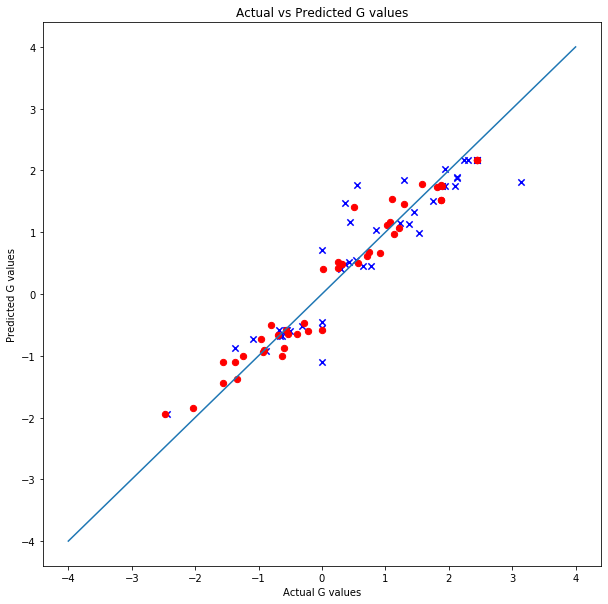

In [35]:
x = np.linspace(-4,4,10)

plt.scatter(results['Actual'], results['Predicted'], color = 'b', marker = 'x', s = 40)
plt.scatter(train_results['Actual'], train_results['Predicted'], color = 'r', marker = 'o', s = 40)
#plt.xlim(0, 4)
#plt.ylim(-1, 3)
plt.plot(x, x)
plt.title('Actual vs Predicted G values')
plt.xlabel('Actual G values')
plt.ylabel('Predicted G values')
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

In [37]:
OOS_pred = forest.predict(X_oos_iminium.reset_index().drop(['Reaction'], axis = 1))

oos_results = pd.concat([Y_oos.reset_index(), pd.DataFrame(OOS_pred)], axis = 1)
oos_results.set_index('Reaction', inplace = True)
oos_results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_oos, OOS_pred)))
print('Mean Absolute Error 18: ' + str(mean_absolute_error(Y_oos.iloc[0:15, :], OOS_pred[0:15])))
print('Mean Absolute Error 19: ' + str(mean_absolute_error(Y_oos.iloc[15:30, :], OOS_pred[15:30])))
print('Mean Absolute Error 20: ' + str(mean_absolute_error(Y_oos.iloc[30:, :], OOS_pred[30:])))
print('r^2: ' + str(r2_score(Y_oos, OOS_pred)))
oos_results.head(30)

MSE: 3.285182648813171
Mean Absolute Error 18: 0.7349699410331518
Mean Absolute Error 19: 3.3528063456736077
Mean Absolute Error 20: 0.7966272027434698
r^2: 0.322353620253216


,Actual,Predicted
Reaction,,
Addition of enecarbamates to benzoyl imines 1,2.169290,1.419542
Addition of enecarbamates to benzoyl imines 2,1.963952,1.419542
Addition of enecarbamates to benzoyl imines 3,1.963952,1.419542
Addition of enecarbamates to benzoyl imines 4,1.963952,1.419542
Addition of enecarbamates to benzoyl imines 5,1.881808,1.419542
Addition of enecarbamates to benzoyl imines 6,2.304448,1.419542
Addition of enecarbamates to benzoyl imines 7,2.169290,1.419542
Addition of enecarbamates to benzoyl imines 8,2.169290,1.386920
Addition of enecarbamates to benzoyl imines 9,2.304448,1.386920
